In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt

## JPM Stocks

In [50]:
df = pd.read_csv("JPM_Time_Series.csv", parse_dates=['Date']) # Parses the Date column as a datetime object
df.set_index('Date', inplace = True) # Set 'Date' as index to prepare for time series modeling


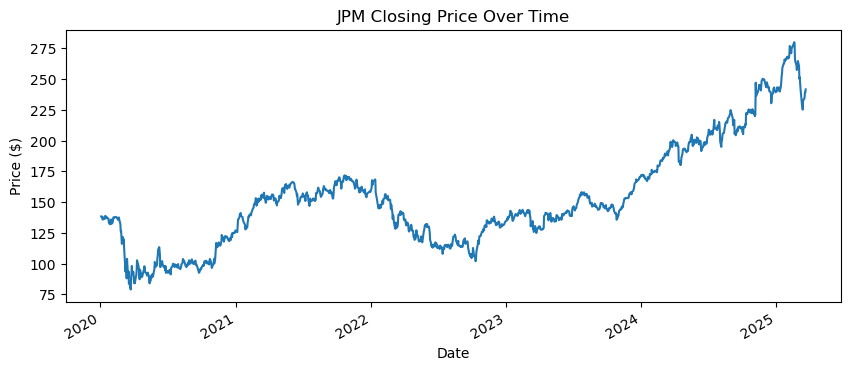

In [58]:
# Visualize JPM's historical closing prices
df['Close'].plot(figsize=(10, 4), title='JPM Closing Price Over Time')
plt.ylabel('Price ($)')
plt.show()

In [52]:
# Auto_arima tests different combinations of (p,d,q) to find the best ARIMA configuration 
stepwise_model = auto_arima(df['Close'],
                            start_p=1, start_q=1,
                            max_p=5, max_q=5,
                            seasonal=False,
                            trace=True,      
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

print("Best model:", stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6321.705, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6324.242, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6321.767, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6322.299, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6323.359, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6319.996, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6318.170, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6319.708, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6293.892, Time=0.50 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6290.775, Time=0.49 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6317.061, Time=0.14 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=6291.376, Time=0.74 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6288.728, Time=0.96 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6286.773, Time=0.90 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept

In [53]:
# We fit an ARIMA model using the best parameters
order = stepwise_model.order # Get best (p,d,q) order
print("Best (p,d,q):", order)

model = ARIMA(df['Close'], order=order)
model_fit = model.fit()

Best (p,d,q): (3, 1, 2)


/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

In [54]:
# Forecast 30 business days ahead
forecast = model_fit.forecast(steps=30) # Forecast next 30 steps


last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B') # Generate future business days


forecast.index = forecast_index # Set forecast index

/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


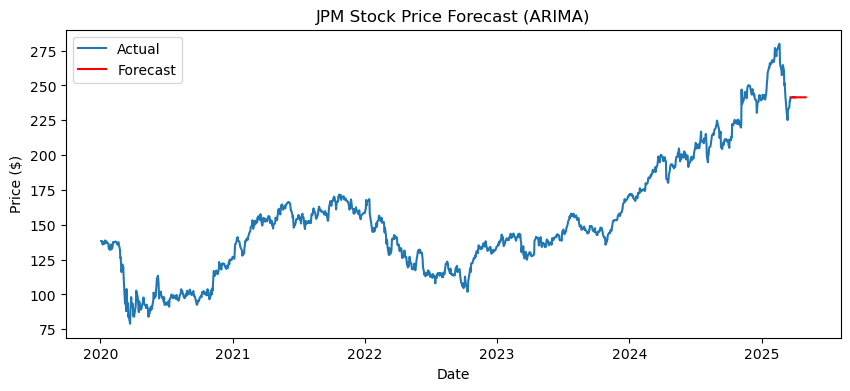

In [55]:
# Plot forecast vs actual
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('JPM Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [ ]:
# Prepare forecast for export
forecast_df = forecast.reset_index()
forecast_df.columns = ['Date', 'Forecast']
forecast_df['Ticker'] = 'JPM'  # Optional: helps if you want to compare multiple stocks

In [56]:
# Combine with actual data
actual_df = df[['Close']].reset_index()
actual_df.columns = ['Date', 'Actual']
actual_df['Ticker'] = 'JPM'

# Merge both 
full_df = pd.merge(actual_df, forecast_df, on='Date', how='outer')

In [57]:
# Export JPM forecast
full_df.to_csv('JPM_Actual_vs_Forecast_2.csv', index=False)

## BA Stocks

In [34]:
df = pd.read_csv("BA_Time_Series.csv", parse_dates=['Date']) 
df.set_index('Date', inplace = True) 

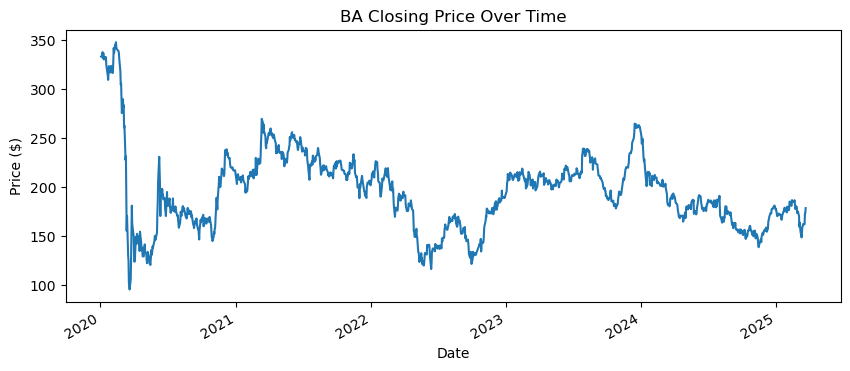

In [37]:
df['Close'].plot(figsize=(10, 4), title='BA Closing Price Over Time')
plt.ylabel('Price ($)')
plt.show()

In [38]:
stepwise_model = auto_arima(df['Close'],
                            start_p=1, start_q=1,
                            max_p=5, max_q=5,
                            seasonal=False,
                            trace=True,       
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

print("Best model:", stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8275.423, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8280.974, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8281.290, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8281.602, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8279.536, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8268.392, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8266.394, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8268.392, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8270.391, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8264.802, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8279.812, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=8266.798, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8266.799, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8273.783, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]          

In [39]:
order = stepwise_model.order
print("Best (p,d,q):", order)

model = ARIMA(df['Close'], order=order)
model_fit = model.fit()

Best (p,d,q): (2, 1, 0)


/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
forecast = model_fit.forecast(steps=30)

last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

forecast.index = forecast_index

/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/Projects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


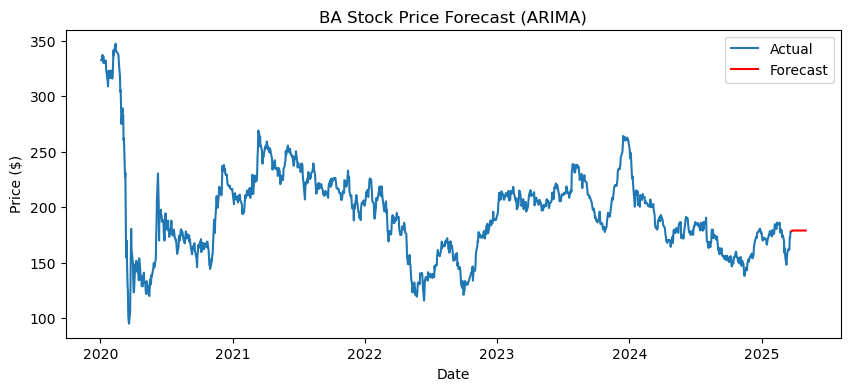

In [41]:
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('BA Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [45]:
forecast_df = forecast.reset_index()
forecast_df.columns = ['Date', 'Forecast']
forecast_df['Ticker'] = 'BA'  


In [46]:
actual_df = df[['Close']].reset_index()
actual_df.columns = ['Date', 'Actual']
actual_df['Ticker'] = 'BA'

full_df = pd.merge(actual_df, forecast_df, on='Date', how='outer')

In [47]:
full_df.to_csv('BA_Actual_vs_Forecast.csv', index=False)